...

Concatenated DataFrame saved to: concatenated_output\combined_reviews.csv
Sentiment Value Counts Plot:

Plot is saved to test_plots\TestBank - Sentiment Distribution.png.



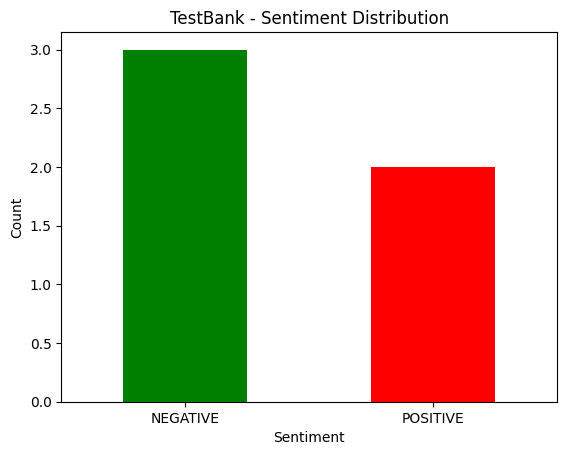


Aggregated Results:
  bank_name  rating  mean_sentiment_score  rating_count
0  TestBank       2              0.998928             1
1  TestBank       3              0.999749             1
2  TestBank       4              0.998888             1
3  TestBank       5              0.997718             2
Rating Distribution Plot:


Plot is saved to test_plots\TestBank - Rating Distribution.png.



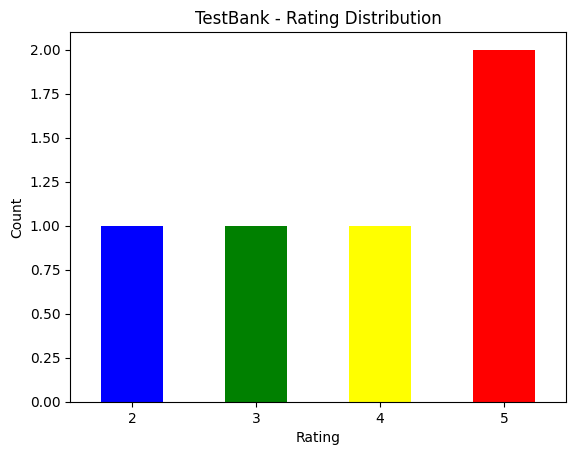


TF-IDF Matrix Shape: (5, 25)
First 25 Feature Names: ['app' 'app login' 'customer' 'customer support' 'delay' 'feature' 'great'
 'great user' 'helpful' 'interface' 'login' 'login slow' 'money'
 'money transfer' 'need' 'need new' 'new' 'new feature' 'slow' 'support'
 'support helpful' 'transfer' 'transfer delay' 'user' 'user interface']

Top 20 Keywords in Positive Reviews: ['customer' 'great' 'helpful' 'interface' 'support' 'user']

 Top 20 Keywords in Negative Reviews: ['app' 'delay' 'feature' 'login' 'money' 'need' 'new' 'slow' 'transfer']

Plot is saved to test_plots\TestBank -Word Cloud for Positive Reviews.png.



c:\Users\nuhamin\Documents\kifiya\week 2\Customer-Experience-Analytics-for-Fintech-Apps\.venv\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


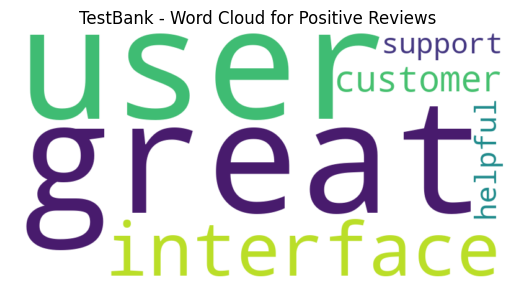


Plot is saved to test_plots\TestBank - Word Cloud for Negative Reviews.png.



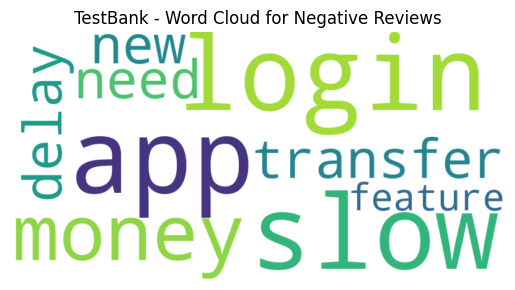


Processed DataFrame Saved to: test_output\TestBank_result.csv

DataFrame Head:
         date  rating                    review_text sentiment     score  \
0  2023-01-01       3         The app login is slow.  NEGATIVE  0.999749   
1  2023-01-02       5          Great user interface!  POSITIVE  0.999876   
2  2023-01-03       2    Money transfer was delayed.  NEGATIVE  0.998928   
3  2023-01-04       4  Customer support was helpful.  POSITIVE  0.998888   
4  2023-01-05       5            Need a new feature.  NEGATIVE  0.995561   

               spacy_keywords                     identified_theme(s)  \
0            app, login, slow                   Account Access Issues   
1      great, user, interface             User Interface & Experience   
2      money, transfer, delay  Transaction Performance/Payment Issues   
3  customer, support, helpful                        Customer Support   
4          need, new, feature       Feature Requests/Missing Features   

  bank_name  
0  TestBan

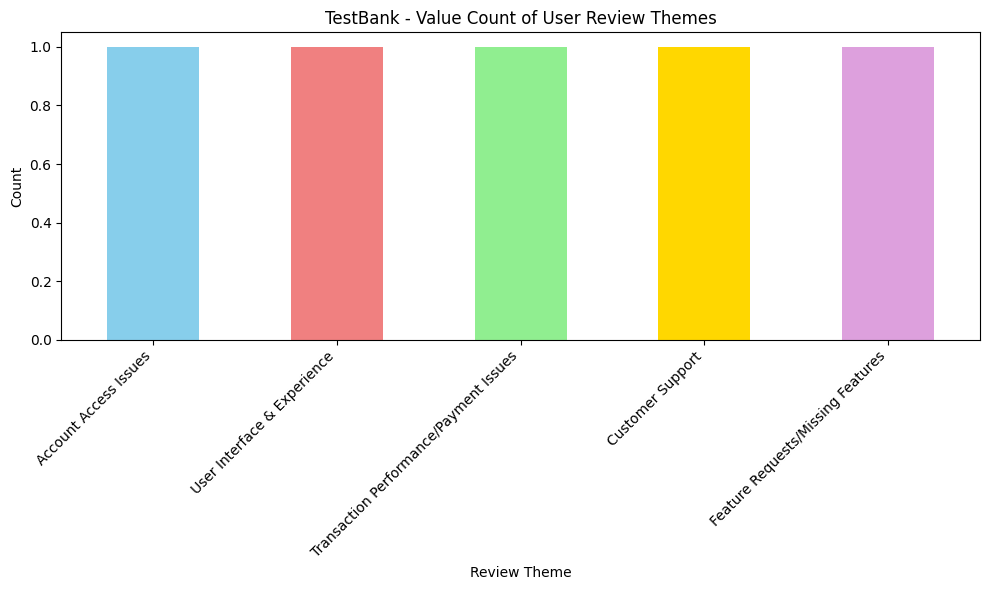

....
----------------------------------------------------------------------
Ran 7 tests in 0.895s

OK



Plot is saved to test_plots\dummy_plot.png.



In [2]:
#import necessary modules and libraries
import unittest
import os
import pandas as pd
import os
import sys
import shutil
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

#import custom module
sys.path.append(os.path.abspath(os.path.join('..')))
try:
    from scripts.sentiment_thematic_analysis import save_plot
    from scripts.sentiment_thematic_analysis import preprocess_text
    from scripts.sentiment_thematic_analysis import calculate_tfidf
    from scripts.sentiment_thematic_analysis import extract_keywords_spacy
    from scripts.sentiment_thematic_analysis import assign_theme
    from scripts.sentiment_thematic_analysis import dfloader_and_analyser
    from scripts.sentiment_thematic_analysis import concat_and_save_dfs

except ImportError:
    print('Could not import module from `scripts/`.')

class TestAnalysisFunctions(unittest.TestCase):
    def setUp(self):
        #method is called before each test
        self.sample_text = 'This is a sample review text about a slow transaction and a good user interface.'
        self.sample_reviews_df = pd.DataFrame({
            'review_text': [
                'The app login is slow.',
                'Great user interface!',
                'Money transfer was delayed.',
                'Customer support was helpful.',
                'Need a new feature.'
            ],
             'rating': [3, 5, 2, 4, 5],
             'date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
             'bank_name': ["TestBank", "TestBank", "TestBank", "TestBank", "TestBank"],
             'source': ["Google Play", "Google Play", "Google Play", "Google Play", "Google Play"]
        })
        self.dummy_output_folder = "test_output"
        self.dummy_plot_folder = "test_plots"
        os.makedirs(self.dummy_output_folder, exist_ok=True)
        os.makedirs(self.dummy_plot_folder, exist_ok=True)


    def tearDown(self):
        #clean up dummy folders after each test
        if os.path.exists(self.dummy_output_folder):
             shutil.rmtree(self.dummy_output_folder)
        if os.path.exists(self.dummy_plot_folder):
             shutil.rmtree(self.dummy_plot_folder)

    def test_save_plot(self):
        #test the save_plot function
        plt.figure() #create a dummy plot
        plt.plot([1, 2, 3])
        plot_name = "dummy_plot.png"
        plot_path = os.path.join(self.dummy_plot_folder, plot_name)
        save_plot(self.dummy_plot_folder, plot_name, plot_path)
        self.assertTrue(os.path.exists(plot_path))
        plt.close() #close the dummy plot

    def test_preprocess_text(self):
        #test the preprocess_text function
        processed = preprocess_text(self.sample_text)
        self.assertIsInstance(processed, str)
        self.assertNotIn('this', processed)        #check for stop word removal
        self.assertNotIn('.', processed)           #check for punctuation removal
        self.assertIn('transaction', processed)    #check for lemmatization

    def test_calculate_tfidf(self):
        #test the calculate_tfidf function
        texts = ["This is the first document.", "This document is the second document."]
        tfidf_matrix, feature_names = calculate_tfidf(texts)
        self.assertIsNotNone(tfidf_matrix)
        self.assertIsNotNone(feature_names)

        #check for scipy.sparse.csr_matrix
        self.assertIsInstance(tfidf_matrix, csr_matrix)            #check the type of the matrix
        self.assertIsInstance(feature_names, np.ndarray)           #check the type of feature names
        self.assertGreater(len(feature_names), 0)                  #check if features were extracted

    def test_extract_keywords_spacy(self):
        #test the extract_keywords_spacy function
        keywords = extract_keywords_spacy(self.sample_text)
        self.assertIsInstance(keywords, str)

        #add more specific assertions based on expected keywords from sample_text
        self.assertIn('review', keywords)
        self.assertIn('transaction', keywords)
        self.assertIn('interface', keywords)


    def test_assign_theme(self):
        #test the assign_theme function with different review texts
        self.assertEqual(assign_theme("Cannot login to my account.",
                                    "login, account"), 'Account Access Issues')
        self.assertEqual(assign_theme("Money transfer is very slow.",
                                    "money, transfer, slow"), 'Transaction Performance/Payment Issues')
        self.assertEqual(assign_theme("The design of the app is great.",
                                    "design, app"), 'User Interface & Experience')
        self.assertEqual(assign_theme("Customer service helped me quickly.",
                                    "customer service, help"), 'Customer Support')
        self.assertEqual(assign_theme("I wish they would add a new feature.",
                                    "wish, add, new feature"), 'Feature Requests/Missing Features')
        self.assertEqual(assign_theme("This is a general comment.",
                                    "general, comment"), 'Other')

    def test_dfloader_and_analyser_output(self):
        #test that dfloader_and_analyser produces a df with expected columns and saves a file
        #create a dummy raw CSV file for the test
        dummy_raw_file = os.path.join(self.dummy_output_folder, "TestBank_reviews_raw.csv")
        self.sample_reviews_df.to_csv(dummy_raw_file, index=False)

        #run the function under test
        processed_df = dfloader_and_analyser(dummy_raw_file,
                                             "TestBank", self.dummy_output_folder, self.dummy_plot_folder)

        #assertions for the returned DataFrame
        self.assertIsNotNone(processed_df)
        self.assertIsInstance(processed_df, pd.DataFrame)
        expected_cols = ['date', 'rating', 'review_text', 'sentiment',
                         'score', 'spacy_keywords', 'identified_theme(s)', 'bank_name']
        for col in expected_cols:
            self.assertIn(col, processed_df.columns)

        #assertions for the saved output file
        results_df_name = os.path.join(self.dummy_output_folder, "TestBank_result.csv")
        self.assertTrue(os.path.exists(results_df_name))
        saved_df = pd.read_csv(results_df_name)
        self.assertEqual(len(saved_df), len(self.sample_reviews_df))

        #assertions for the saved plot files (checking if files exist)
        sentiment_plot_path = os.path.join(self.dummy_plot_folder, "TestBank - Sentiment Distribution.png")
        rating_plot_path = os.path.join(self.dummy_plot_folder, "TestBank - Rating Distribution.png")
        positive_wordcloud_path = os.path.join(self.dummy_plot_folder, "TestBank -Word Cloud for Positive Reviews.png")
        negative_wordcloud_path = os.path.join(self.dummy_plot_folder, "TestBank - Word Cloud for Negative Reviews.png")
        theme_plot_path = os.path.join(self.dummy_plot_folder, "TestBank - Value Count of User Review Themes.png")

        self.assertTrue(os.path.exists(sentiment_plot_path))
        self.assertTrue(os.path.exists(rating_plot_path))
        self.assertTrue(os.path.exists(theme_plot_path))
        #check for word cloud files only if there are positive/negative reviews
        if not self.sample_reviews_df[self.sample_reviews_df['review_text'].apply(preprocess_text) != ''].empty:
             self.assertTrue(os.path.exists(positive_wordcloud_path))
             self.assertTrue(os.path.exists(negative_wordcloud_path))


    def test_concat_and_save_dfs(self):
        #test the concat_and_save_dfs function
        dummy_folder_concat = "dummy_dfs_concat" 
        dummy_output_folder_concat = "concatenated_output"
        df1_path = os.path.join(dummy_folder_concat, "df1.csv")
        df2_path = os.path.join(dummy_folder_concat, "df2.csv")
        output_name = "combined_reviews.csv"
        output_path = os.path.join(dummy_output_folder_concat, output_name)

        #create dummy dataframes and save them
        dummy_data1 = {'col1': [1, 2], 'col2': ['a', 'b']}
        dummy_df1 = pd.DataFrame(dummy_data1)
        dummy_data2 = {'col1': [3, 4], 'col2': ['c', 'd']}
        dummy_df2 = pd.DataFrame(dummy_data2)

        if not os.path.exists(dummy_folder_concat):
            os.makedirs(dummy_folder_concat)
        if not os.path.exists(dummy_output_folder_concat):
            os.makedirs(dummy_output_folder_concat)

        dummy_df1.to_csv(df1_path, index=False)
        dummy_df2.to_csv(df2_path, index=False)

        #run the function under test
        combined_df = concat_and_save_dfs([df1_path, df2_path],
                                          dummy_output_folder_concat, output_name)

        #assertions
        self.assertIsNotNone(combined_df)
        self.assertIsInstance(combined_df, pd.DataFrame)
        self.assertEqual(len(combined_df), len(dummy_df1) + len(dummy_df2))
        self.assertTrue(os.path.exists(output_path))

        #clean up dummy folders
        if os.path.exists(dummy_folder_concat):
            shutil.rmtree(dummy_folder_concat)
        if os.path.exists(dummy_output_folder_concat):
            shutil.rmtree(dummy_output_folder_concat)

#run test on the last two functions
if __name__ == '__main__':
    import sys; sys.argv = ['', 'TestAnalysisFunctions.test_dfloader_and_analyser_output', 'TestAnalysisFunctions.test_concat_and_save_dfs']
    unittest.main(argv=['first-arg-is-ignored'], exit=False)